# Notebook 3: Supervised Learning using the SKLearn Library

The aim of this notebook is to apply the methods that you have learned about in notebook 1 and 2. If you get stuck (i) check the documentation for the relevant python libraries (ii) ask a teaching assistant. 


For this example, we will be using part of the Heart Disease dataset from the UCI machine learning repository. The data dictionary, which explains each of the columns, can be found at https://archive.ics.uci.edu/ml/datasets/heart+disease.



Before that, we import the Python libraries that we will be using. We then import the data using *read_csv*. Note that was use the option na_values='?' to convert question marks in the raw data to nan (not a number). If we did not do this, then Python would interpret columns containing '?' as a string, rather than a number.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/maalvarezl/COMP61011-Foundations-of-Machine-Learning-Module/main/Labs/data.csv', na_values='?')
y = data.NUM   # Y are the labels
X = data.iloc[: , :-1] # X are the features

## Pre-process data
The code below pre-processes the data in the following ways.
1.) Encoding any of the categorical variables using one-hot encoding
2.) Appropriate imputation of missing data
3.) Splitting the data into a training and test set
4.) Data normalisation


In [14]:
# View the data first
X.head

<bound method NDFrame.head of      Age  Sex  CP  TRESTBPS  CHOL  FBS  RESTECG  THALACH  EXANG  OLDPEAK  \
0     32    1   1      95.0     0  NaN      0.0    127.0    0.0      0.7   
1     34    1   4     115.0     0  NaN      NaN    154.0    0.0      0.2   
2     35    1   4       NaN     0  NaN      0.0    130.0    1.0      NaN   
3     36    1   4     110.0     0  NaN      0.0    125.0    1.0      1.0   
4     38    0   4     105.0     0  NaN      0.0    166.0    0.0      2.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
118   70    1   4     115.0     0  0.0      1.0     92.0    1.0      0.0   
119   70    1   4     140.0     0  1.0      0.0    157.0    1.0      2.0   
120   72    1   3     160.0     0  NaN      2.0    114.0    0.0      1.6   
121   73    0   3     160.0     0  0.0      1.0    121.0    0.0      0.0   
122   74    1   2     145.0     0  NaN      1.0    123.0    0.0      1.3   

     SLOPE   CA  THAL  
0      1.0  NaN   NaN  
1      1.

view the output labels too. In this case we've plotted the data as a histogram, and we can see that there are 5 categories of output. As we are trying to classify into more than two categories, we will be using extensions to the Perceptron (one vs all) and Logistic Regression (softmax regression). The SKLearn library automatically applies these extensions

<AxesSubplot:>

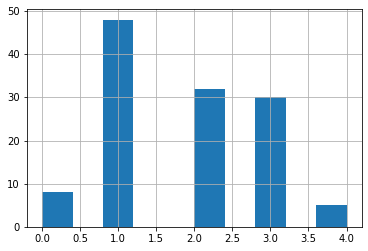

In [54]:
y.hist()

## One hot encoding for categorical variables

In [15]:
# Encode categorical variables - we need to do this for categorical variables coded as multiple numbers, as the
# value of the number has no meaning

#encode the CP variable, which takes values 1-4
CP_onehot = pd.get_dummies(X.CP,prefix='CP') # create the one hot encoded variables
X = pd.concat([X, CP_onehot], axis=1) # add the encoded variable back into the dataframe
X.drop(['CP'], axis=1) # remove the original variable

,Age,Sex,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL
0,32,1,95.0,0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN
1,34,1,115.0,0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN
2,35,1,NaN,0,NaN,0.0,130.0,1.0,NaN,NaN,NaN,7.0
3,36,1,110.0,0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0
4,38,0,105.0,0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
118,70,1,115.0,0,0.0,1.0,92.0,1.0,0.0,2.0,NaN,7.0
119,70,1,140.0,0,1.0,0.0,157.0,1.0,2.0,2.0,NaN,7.0
120,72,1,160.0,0,NaN,2.0,114.0,0.0,1.6,2.0,2.0,NaN
121,73,0,160.0,0,0.0,1.0,121.0,0.0,0.0,1.0,NaN,3.0


## Impute missing data

We'll next determine which features contain missing data, and look at the distributions of the non-missing data for these features.

While there are sophisticated ways of dealing with missing data, we will assign the any missing numbers to modal value for each feature. **What do you think the problems are with this approach?**

**note that it is more appropriate to first split the data into train/test, and then to impute any missing numbers in the training set (and apply the same approach to the test set - why is this a more appropriate approach?**


In [36]:
 X.isna().sum()

Age           0
Sex           0
CP            0
TRESTBPS      2
CHOL          0
FBS          75
RESTECG       1
THALACH       1
EXANG         1
OLDPEAK       6
SLOPE        17
CA          118
THAL         52
dtype: int64

In [38]:
cols = ["TRESTBPS", "FBS","RESTECG","THALACH","EXANG","OLDPEAK","SLOPE","CA","THAL"]
X[cols]=X[cols].fillna(X.mode().iloc[0])
X.head

<bound method NDFrame.head of      Age  Sex  CP  TRESTBPS  CHOL  FBS  RESTECG  THALACH  EXANG  OLDPEAK  \
0     32    1   1      95.0     0  0.0      0.0    127.0    0.0      0.7   
1     34    1   4     115.0     0  0.0      0.0    154.0    0.0      0.2   
2     35    1   4     115.0     0  0.0      0.0    130.0    1.0      0.0   
3     36    1   4     110.0     0  0.0      0.0    125.0    1.0      1.0   
4     38    0   4     105.0     0  0.0      0.0    166.0    0.0      2.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
118   70    1   4     115.0     0  0.0      1.0     92.0    1.0      0.0   
119   70    1   4     140.0     0  1.0      0.0    157.0    1.0      2.0   
120   72    1   3     160.0     0  0.0      2.0    114.0    0.0      1.6   
121   73    0   3     160.0     0  0.0      1.0    121.0    0.0      0.0   
122   74    1   2     145.0     0  0.0      1.0    123.0    0.0      1.3   

     SLOPE   CA  THAL  
0      1.0  2.0   7.0  
1      1.

## split into training and test data

In [39]:
# split the dataset into training + testing
# note that we're not importing the whole sklearn library - just the functions we want
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# setting the random_state to a fixed values means that the split between train and test is consistent between runs.
# This is useful to check that our code is running properly, but we might want to remove if we were checking variability (for instance) over multiple runs

In [40]:
# Data normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
scaler.mean_ #show the means for each column

array([5.57195122e+01, 9.02439024e-01, 3.70731707e+00, 1.33658537e+02,
       0.00000000e+00, 3.65853659e-02, 3.53658537e-01, 1.22085366e+02,
       4.87804878e-01, 6.43902439e-01, 1.85365854e+00, 1.97560976e+00,
       6.18292683e+00])

In [63]:
scaler.var_ #show the variances for each column

array([7.80066924e+01, 8.80428316e-02, 4.26531826e-01, 5.49419988e+02,
       0.00000000e+00, 3.52468769e-02, 3.26145152e-01, 7.62931737e+02,
       2.49851279e-01, 9.16365259e-01, 3.44437835e-01, 2.37953599e-02,
       2.49092802e+00])

## Model Training
We will train two models that were introduced in the lectures, a logistic regression and a perceptron. To ensure that the model is training correctly, we plot the training loss after each iteration of the algorithm.

### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

### Perceptron


In [43]:
from sklearn.linear_model import Perceptron
model = Perceptron(tol=1e-3, random_state=0)
model.fit(X_train, y_train)

Perceptron()

## Model Evaluation

We will evaluate the two models using accuracy (the percentage of correct classifications)

In [52]:
score = logreg.score(X_test,y_test)
print(score)

0.36585365853658536


In [47]:
from sklearn.metrics import accuracy_score
y_pred = logreg.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[ 0  2  0  1  0]
 [ 2 11  1  1  0]
 [ 0  5  2  4  0]
 [ 0  5  1  2  0]
 [ 0  2  2  0  0]]


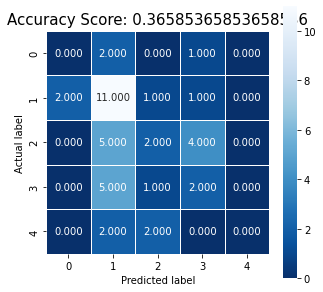

In [51]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Sensitivity and Specificity

In the lectures, we showed how to calculate sensitivity and specificity. These require us to calculate 'True Positives', 'True Negatives', 'False Positives' and 'False Negatives'. These do not readily apply to multiclass classification problems, but we *can* consider each class in turn (in a one vs all way). Doing so will give us a 2x2 confusion matrix for each class:

In [59]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, y_pred)

array([[[36,  2],
        [ 3,  0]],

       [[12, 14],
        [ 4, 11]],

       [[26,  4],
        [ 9,  2]],

       [[27,  6],
        [ 6,  2]],

       [[37,  0],
        [ 4,  0]]], dtype=int64)